<a href="https://colab.research.google.com/github/francji1/01NAEX/blob/main/01NAEX_HW02_matrix_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 01NAEX - Homework 2: Matrix multiplication problem
author: students



# Assignment

Design an experiment to measure the computation speed of manual matrix multiplication that examines the dependence on 6 factors. Assume that, due to time constraints, you are forced to use a $\frac{1}{2}$ fraction design: $2^{6-1}$ or a $\frac{1}{4}$ fraction design: $2^{6-2}$ with replications, or full factorial design with operators as blocks.

The response is the time in seconds that you measure.

## The factors examined are (you can change the factors, but keep the number of factors):

 1) matrix size - small (3x3) x large (4x4)     
 2) representation of zeros (sparsity of the matrix) - small (cca 10%) x large (cca 30%)

 3) influence of concentration 1 - ticho x hudba na plný koule (slipknot)      
 4) computational core - Bára x Štěpán       
 5) range of integers - 0-10 x 0-20     
 6) using calculator x without using calculator      

 Influence concentration take for example music, time of day, intoxicants (i.e. chocolate, ...), ...

## Note on measurement

What factor do you expect to have no effect on the result? What factors do you mark in advance as most influential factors. Arrange the factors so that if your assumption is confirmed, you will receive a design with at least Resolution IV.

If there are more of you in the group and the number of you allows to create orthogonal blocks, create them Each of you will make at least 8 measurements.
If the number of you in the group does not match $2^k$, for example, measure all the same thing, treat the blocks as replications, or use only the $2^k$ operator.

### Additional measurements

It is suspected that the influence of quantitative variables is not linear. Measure the experiment in  "center points" - the midpoint between the high and low levels and analyze this design.


## Design an experiment and answer the following questions (For 0-4, use data without center points).

 0) Decide how you will determine the low and high levels for each variable. What data will you record.

 1) What are the generators used in the design and why did you choose them?
    What is the resolution and alias structure for the given design?
If you have multiple operators, is the effect of this nuisance factor in the representation with any effect of interest?
    What is the alternative division (alternative generators)?

 2) Count the individual effects (include the substitution structure).

 3) Find out what factors and their interactions appear significant (use daniel and pareto plot)
    Create main effects plot, interaction plot, boxplots.
    What can be inferred from the data? Comment carefully. If you know another useful visualization of the measured values, do it.

 4) Perform analysis of variance, find and validate the resulting model without center point.

 5) Use additional assumptions and additional measurements at the centres,
     and confirm or reject assumption of the linear dependence in the numerical variables.

 6) Construct a regression model where you convert the coded quantitative variables to actual numerical values    (use the other variables according to their significance).

  7) Use a regression model with at least two numerical variables (even if they are less significant). Plot a contour plot for the two quantitative variables and find the optimal values (maximum/minimum response) in intervals increased by 10% compared to the extreme values from the experimental design. In the contour plot, use actual values instead of code values.


## Submission

Upload the completed report in pdf format with the corresponding Rmarkdown Rmd file, or Jupyter notebook with the code and the measured data in MS Teams by 28.11.2022 in the format 01NAEX_HW2_TeamName.PDF (R, csv).


In [ ]:
list_of_packages <- c("lattice","MASS","scatterplot3d","FrF2","dplyr","tidyverse","ggplot2","car","pid","qcc")
missing_packages <- list_of_packages[!(list_of_packages %in% installed.packages()[,"Package"])]
missing_packages

character(0)

In [ ]:
system("sudo apt-get install libgmp-dev")
install.packages("gmp")
system("sudo apt-get install libpartitions-dev")
install.packages("partitions")
system("sudo apt-get install libDoE.base-dev")
install.packages("DoE.base")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
if(length(missing_packages)) install.packages(missing_packages)
lapply(list_of_packages, library, character.only = TRUE)

[[1]]
 [1] "qcc"           "pid"           "car"           "carData"      
 [5] "lubridate"     "forcats"       "stringr"       "purrr"        
 [9] "readr"         "tidyr"         "tibble"        "ggplot2"      
[13] "tidyverse"     "dplyr"         "FrF2"          "DoE.base"     
[17] "conf.design"   "grid"          "scatterplot3d" "MASS"         
[21] "lattice"       "stats"         "graphics"      "grDevices"    
[25] "utils"         "datasets"      "methods"       "base"         

[[2]]
 [1] "qcc"           "pid"           "car"           "carData"      
 [5] "lubridate"     "forcats"       "stringr"       "purrr"        
 [9] "readr"         "tidyr"         "tibble"        "ggplot2"      
[13] "tidyverse"     "dplyr"         "FrF2"          "DoE.base"     
[17] "conf.design"   "grid"          "scatterplot3d" "MASS"         
[21] "lattice"       "stats"         "graphics"      "grDevices"    
[25] "utils"         "datasets"      "methods"       "base"         

[[3]]
 [1] "qcc"           "pid"           "car"           "carData"      
 [5] "lubridate"     "forcats"       "stringr"       "purrr"        
 [9] "readr"         "tidyr"         "tibble"        "ggplot2"      
[13] "tidyverse"     "dplyr"         "FrF2"          "DoE.base"     
[17] "conf.design"   "grid"          "scatterplot3d" "MASS"         
[21] "lattice"       "stats"         "graphics"      "grDevices"    
[25] "utils"         "datasets"      "methods"       "base"         

[[4]]
 [1] "qcc"           "pid"           "car"           "carData"      
 [5] "lubridate"     "forcats"       "stringr"       "purrr"        
 [9] "readr"         "tidyr"         "tibble"        "ggplot2"      
[13] "tidyverse"     "dplyr"         "FrF2"          "DoE.base"     
[17] "conf.design"   "grid"          "scatterplot3d" "MASS"         
[21] "lattice"       "stats"         "graphics"      "grDevices"    
[25] "utils"         "datasets"      "methods"       "base"         

[[5]]
 [1] "qcc"           "pid"           "car"           "carData"      
 [5] "lubridate"     "forcats"       "stringr"       "purrr"        
 [9] "readr"         "tidyr"         "tibble"        "ggplot2"      
[13] "tidyverse"     "dplyr"         "FrF2"          "DoE.base"     
[17] "conf.design"   "grid"          "scatterplot3d" "MASS"         
[21] "lattice"       "stats"         "graphics"      "grDevices"    
[25] "utils"         "datasets"      "methods"       "base"         

[[6]]
 [1] "qcc"           "pid"           "car"           "carData"      
 [5] "lubridate"     "forcats"       "stringr"       "purrr"        
 [9] "readr"         "tidyr"         "tibble"        "ggplot2"      
[13] "tidyverse"     "dplyr"         "FrF2"          "DoE.base"     
[17] "conf.design"   "grid"          "scatterplot3d" "MASS"         
[21] "lattice"       "stats"         "graphics"      "grDevices"    
[25] "utils"         "datasets"      "methods"       "base"         

[[7]]
 [1] "qcc"           "pid"           "car"           "carData"      
 [5] "lubridate"     "forcats"       "stringr"       "purrr"        
 [9] "readr"         "tidyr"         "tibble"        "ggplot2"      
[13] "tidyverse"     "dplyr"         "FrF2"          "DoE.base"     
[17] "conf.design"   "grid"          "scatterplot3d" "MASS"         
[21] "lattice"       "stats"         "graphics"      "grDevices"    
[25] "utils"         "datasets"      "methods"       "base"         

[[8]]
 [1] "qcc"           "pid"           "car"           "carData"      
 [5] "lubridate"     "forcats"       "stringr"       "purrr"        
 [9] "readr"         "tidyr"         "tibble"        "ggplot2"      
[13] "tidyverse"     "dplyr"         "FrF2"          "DoE.base"     
[17] "conf.design"   "grid"          "scatterplot3d" "MASS"         
[21] "lattice"       "stats"         "graphics"      "grDevices"    
[25] "utils"         "datasets"      "methods"       "base"         

[[9]]
 [1] "qcc"           "pid"           "car"           "carData"      
 [5] 

# Data measurement

In [ ]:
library(lattice)
library(MASS)
library(scatterplot3d)
library(FrF2)

In [ ]:
#funkce na stavbu matic
#size: 3x3 = -1, 4x4 = 1
#sparsity: 10% = -1, 30% = 1
#range: 0-10 = -1, 0-20 = 1
generate_mat <- function(size, sparsity, range){
  if (size == -1) n = 3 else if (size == 1) n = 4 else n = sqrt(12)
  if (range == -1) max_val = 10 else if (range == 1) max_val = 20 else max_val = 15
  if (sparsity == -1) spars = 0.1 else if (sparsity == 1) spars = 0.3 else spars = 0.2
  min_val = 1

  random_values <- sample(seq(min_val, max_val), size = round(n^2), replace = TRUE)

  random_values <- ifelse(runif(length(random_values)) < spars, 0, random_values)

  if (size == 0){
    random_matrix <- matrix(random_values, nrow = 3, ncol = 4)
  }
  else{
    random_matrix <- matrix(random_values, nrow = n, ncol = n)
  }

  random_matrix
}

In [ ]:
#pomocná funkce na printění
print_matrices_side_by_side <- function(matrix1, matrix2, matrix3) {
  max_rows <- max(nrow(matrix1), nrow(matrix2), nrow(matrix3))

  for (i in 1:max_rows) {
    row1 <- ifelse(i <= nrow(matrix1), sprintf("%10s", paste(matrix1[i,], collapse = " ")), "")
    row2 <- ifelse(i <= nrow(matrix2), sprintf("%10s", paste(matrix2[i,], collapse = " ")), "")
    row3 <- ifelse(i <= nrow(matrix3), sprintf("%10s", paste(matrix3[i,], collapse = " ")), "")

    cat(row1, " *   ", row2, " =                                                      ", row3, "\n")
  }
}

In [ ]:
#funkce pro vygenerování celého příkladu
#size: 3x3 = -1, 4x4 = 1
#sparsity: 10% = -1, 30% = 1
#range: 0-10 = -1, 0-20 = 1
generate_priklad <- function(size, sparsity, range){
  mat1 = generate_mat(size, sparsity, range)
  mat2 = generate_mat(size, sparsity, range)
  if (size == 0) mat2 = t(mat2)
  mat3 = mat1 %*% mat2

  print_matrices_side_by_side(mat1, mat2, mat3)
}

In [ ]:
#tady generujete
generate_priklad(0,0,0)

  9 13 8 0  *        4 7 10  =                                                       102 254 283 
 11 5 14 6  *       2 11 13  =                                                       160 288 217 
  3 12 5 2  *         5 6 3  =                                                       73 207 201 
  *        6 12 0  =                                                        


# Measured data

In [ ]:
k=6
n_oper=1

designHW <-  FrF2(2^(k-2), k, replications = n_oper, randomize = T, seed = c(42), generators = c("ABC","BCD"),
                            factor.names = LETTERS[1:k])
summary(designHW)
time <- c(94.4, 246.02, 1005.5, 207.15, 720, 143.81, 259.63, 298.18, 231.11, 87.22, 124.98, 127.79, 62.47, 282.16, 159.35, 208.82)
designHW <- add.response(designHW, time)
# data_exp <- read.table("https://raw.githubusercontent.com/jiri99/NAEX/main/data/HW02_data.csv", header=TRUE, sep=";")

Call:
FrF2(2^(k - 2), k, replications = n_oper, randomize = T, seed = c(42), 
    generators = c("ABC", "BCD"), factor.names = LETTERS[1:k])

Experimental design of type  FrF2.generators 
16  runs

Factor settings (scale ends):
   A  B  C  D  E  F
1 -1 -1 -1 -1 -1 -1
2  1  1  1  1  1  1

Design generating information:
$legend
[1] A=A B=B C=C D=D E=E F=F

$generators
[1] E=ABC F=BCD


Alias structure:
$fi2
[1] AB=CE    AC=BE    AD=EF    AE=BC=DF AF=DE    BD=CF    BF=CD   


The design itself:
    A  B  C  D  E  F
1  -1 -1 -1 -1 -1 -1
2  -1 -1  1 -1  1  1
3   1  1  1  1  1  1
4  -1 -1 -1  1 -1  1
5   1 -1 -1  1  1  1
6   1  1 -1 -1 -1  1
7   1 -1 -1 -1  1 -1
8   1 -1  1  1 -1 -1
9   1  1  1 -1  1 -1
10 -1  1  1 -1 -1 -1
11 -1  1 -1  1  1 -1
12 -1 -1  1  1  1 -1
13 -1  1  1  1 -1  1
14  1  1 -1  1 -1 -1
15 -1  1 -1 -1  1  1
16  1 -1  1 -1 -1  1
class=design, type= FrF2.generators 


In [ ]:
designHW

,A,B,C,D,E,F,time
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,-1,-1,-1,-1,-1,-1,94.40
2,-1,-1,1,-1,1,1,246.02
3,1,1,1,1,1,1,1005.50
4,-1,-1,-1,1,-1,1,207.15
5,1,-1,-1,1,1,1,720.00
6,1,1,-1,-1,-1,1,143.81
7,1,-1,-1,-1,1,-1,259.63
8,1,-1,1,1,-1,-1,298.18
9,1,1,1,-1,1,-1,231.11


Data description:

* A = matrix size: small=-1, large=1
* B = representation of zeros: small=-1, large=1
* C = influence of concentration: ticho=-1, hudba na plný koule (slipknot)=1
* D = computational core: Bára=-1, Štěpán=1
* E = range of integers: 0-10=-1, 0-20=1
* F = calculator: using calculator=-1, without using calculator=1

# Display data

# Data analysis

1) What are the generators used in the design and why did you choose them?
    What is the resolution and alias structure for the given design?
If you have multiple operators, is the effect of this nuisance factor in the representation with any effect of interest?
    What is the alternative division (alternative generators)?

* The generators used are I_1 = ABCE (E = ABC) and I_2 = BCDF (F = BCD), the provide highest possible resolution (based on the table from lecture).

* The resolution is IV, aliasing structure is as follows, AB = CE = ACDF, AC = BE = CDEF, AD = EF = BCDE, AE = BC = DF = ABCDEF, AF = DE = BCEF, BD = CF, BF = CD, A = BCE = ABCDF, B = ACE = FCD, C = ABE = FBD, D = BCF = ABCDE, E = ABC = ADF, F = BCD = ADE. Some higher order alias structures might be ommited.

* We included the operator nuisance as one of our variables.

* For example I_1 = ABCDEF and I_2 = ABCD. This leads to worse resolution.





2) Count the individual effects (include the substitution structure).

There are in total 15 individual effects.
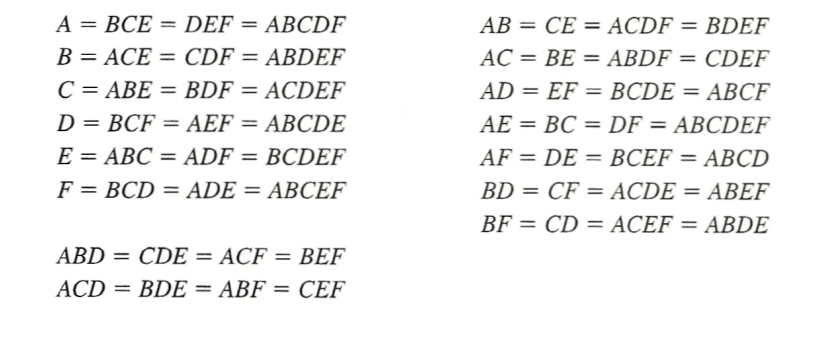

3) Find out what factors and their interactions appear significant (use daniel and pareto plot)
    Create main effects plot, interaction plot, boxplots.
    What can be inferred from the data? Comment carefully. If you know another useful visualization of the measured values, do it.



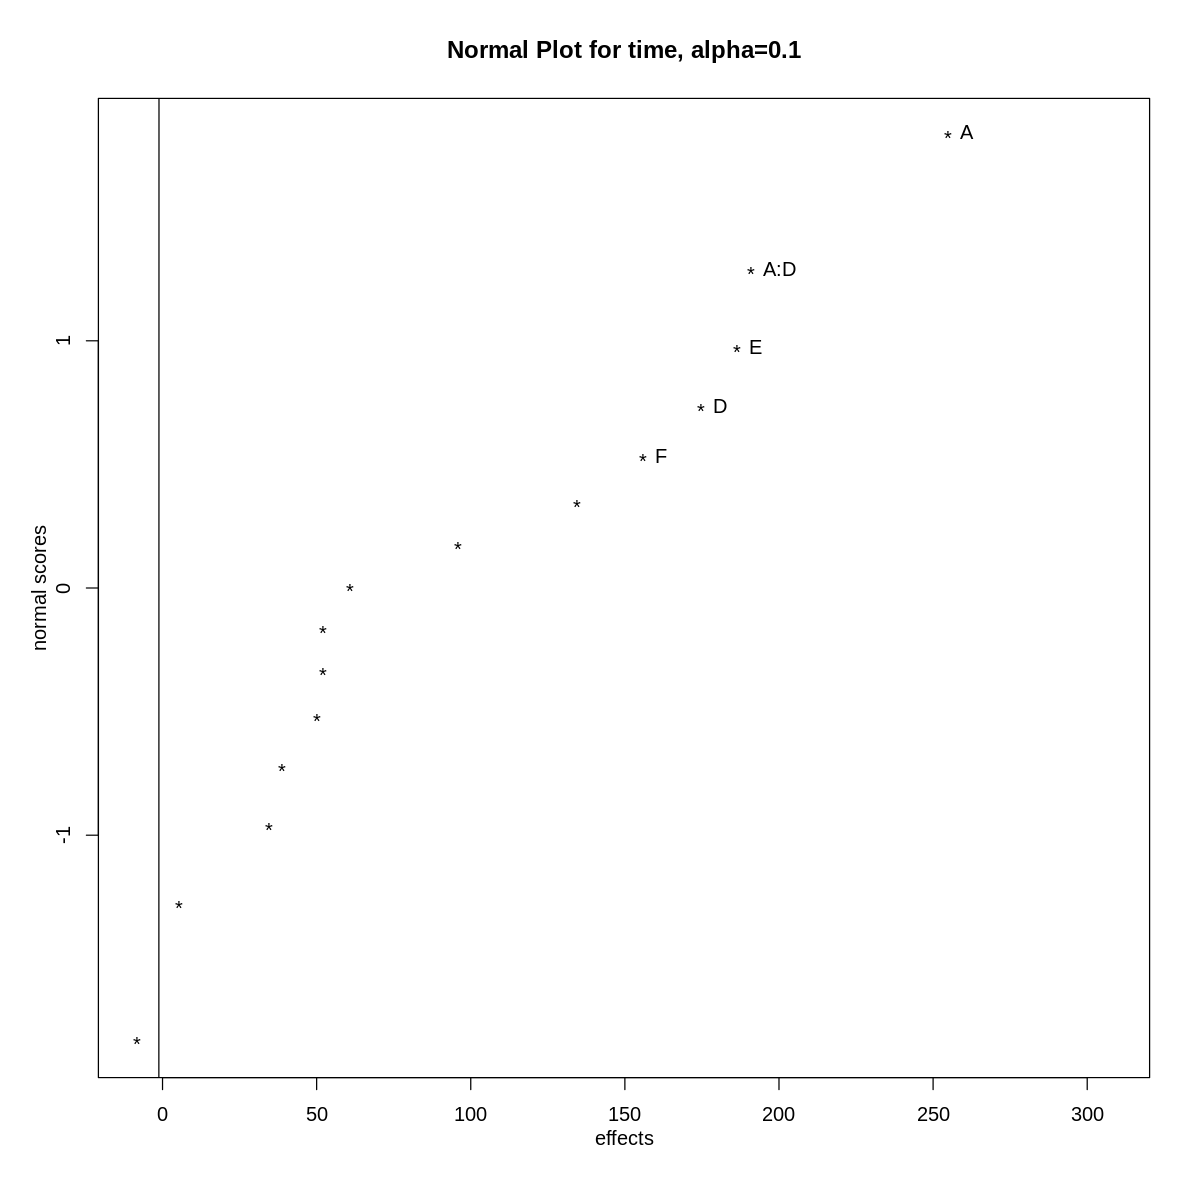

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)
fit <- lm(time ~ A * B * C * D * E * F, data = designHW)
qqline(DanielPlot(fit, alpha = 0.1)$x)

                   
Pareto chart analysis for coefficients[-1]
                      Frequency   Cum.Freq.  Percentage Cum.Percent.
  A1                127.4893750 127.4893750  17.0551638   17.0551638
  A1:D1              95.4418750 222.9312500  12.7679410   29.8231048
  E1                 93.1356250 316.0668750  12.4594175   42.2825223
  D1                 87.3668750 403.4337500  11.6876906   53.9702128
  F1                 77.9781250 481.4118750  10.4316905   64.4019033
  B1:C1              67.2731250 548.6850000   8.9996062   73.4015095
  D1:E1              47.9031250 596.5881250   6.4083430   79.8098525
  A1:C1:D1           30.3993750 626.9875000   4.0667414   83.8765939
  A1:B1              26.0806250 653.0681250   3.4889914   87.3655853
  A1:B1:D1           26.0406250 679.1087500   3.4836403   90.8492256
  A1:C1              25.0243750 704.1331250   3.3476893   94.1969149
  B1:D1              19.3356250 723.4687500   2.5866646   96.7835795
  C1                 17.2268750 740.6956

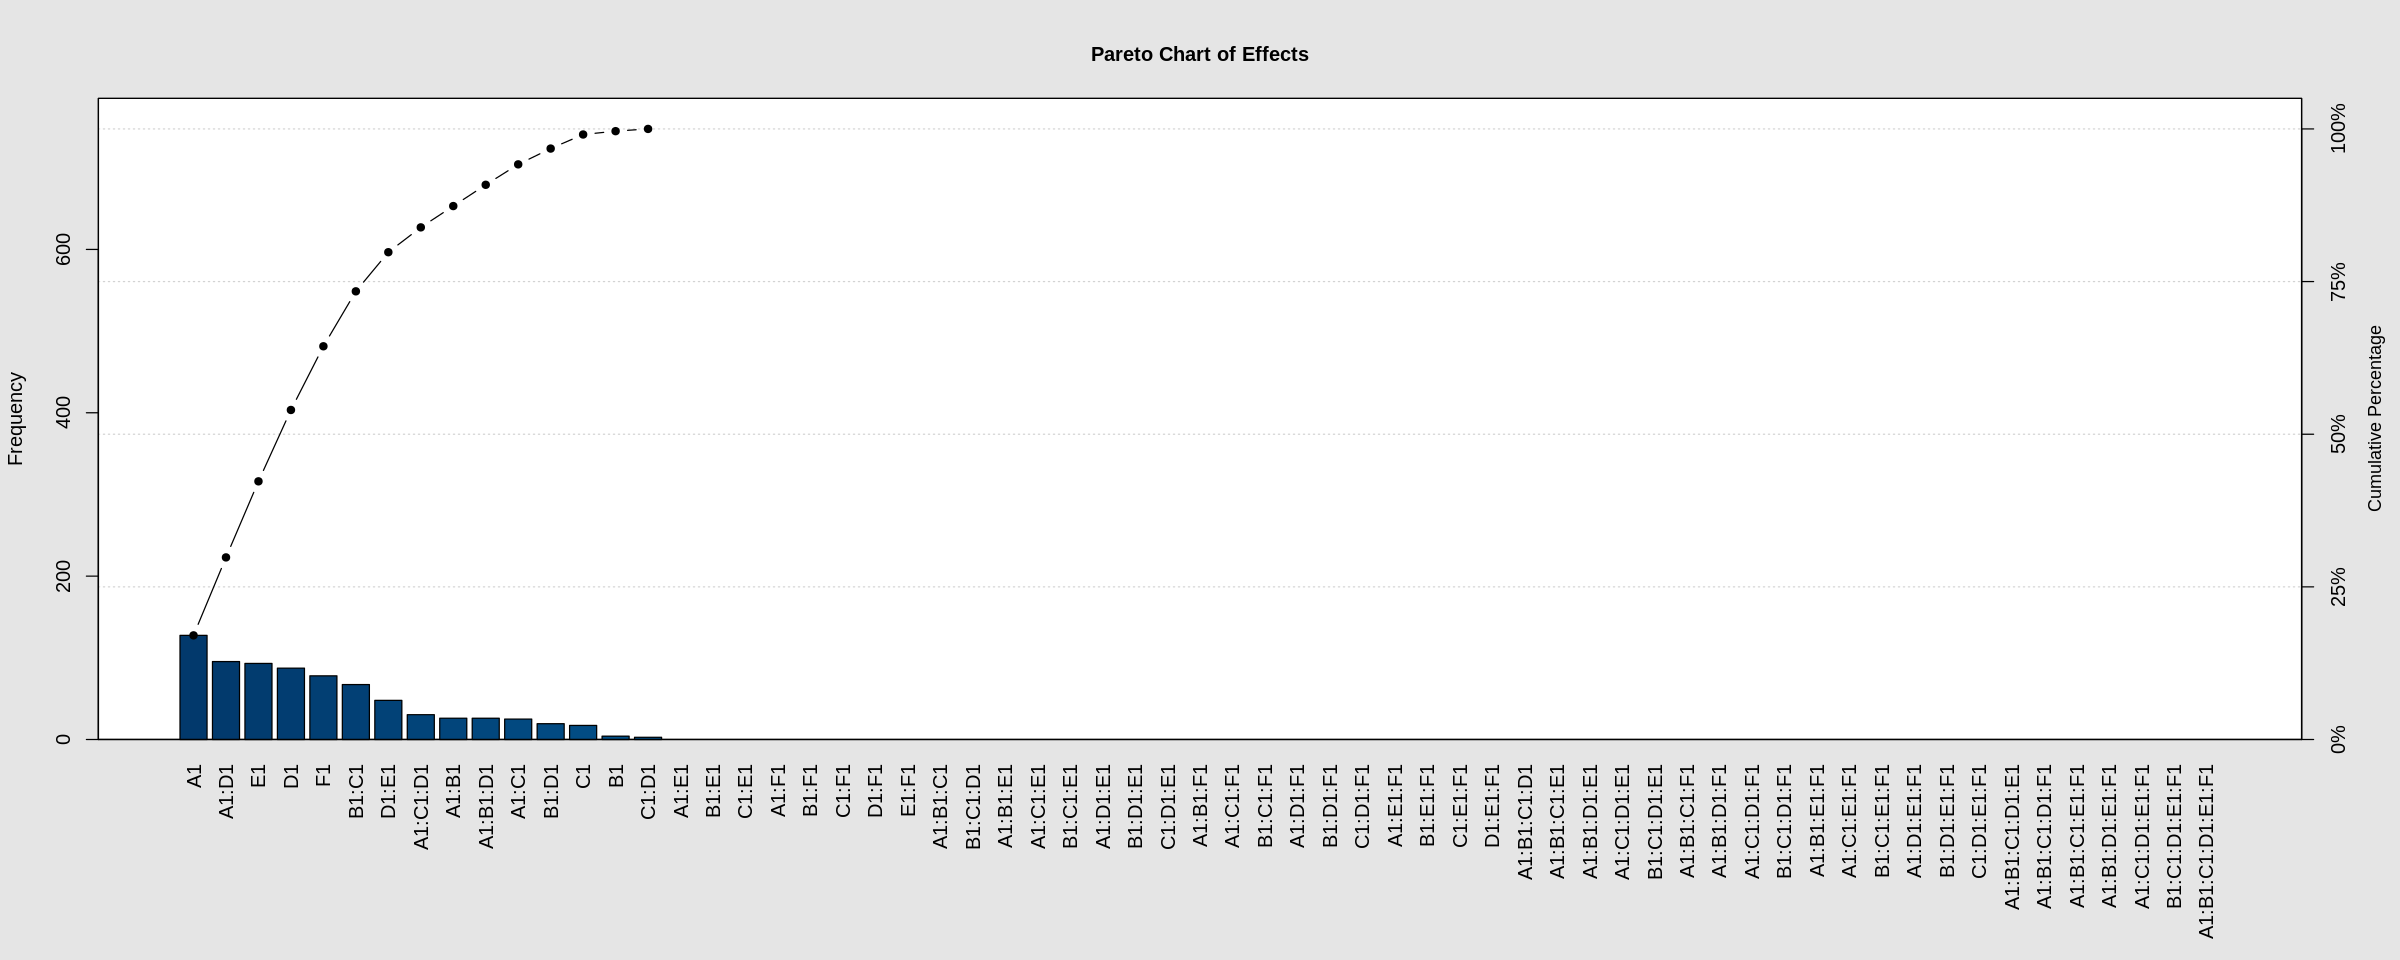

In [ ]:
coefficients <- abs(coef(fit))

options(repr.plot.width = 20, repr.plot.height = 8)
pareto.chart(coefficients[-1], main = "Pareto Chart of Effects")

Daniel plot shows the absolute effect sizes of each factor and interaction. Larger bars indicate a greater impact on the time required for matrix multiplication. Factors such as 'A', 'D', 'E', and 'F' show significant effect sizes, as do some interactions like 'AD'.

Pareto plot displays the cumulative percentage contribution of each effect. It helps in identifying the most influential factors and interactions. Effects to the left are generally considered significant.

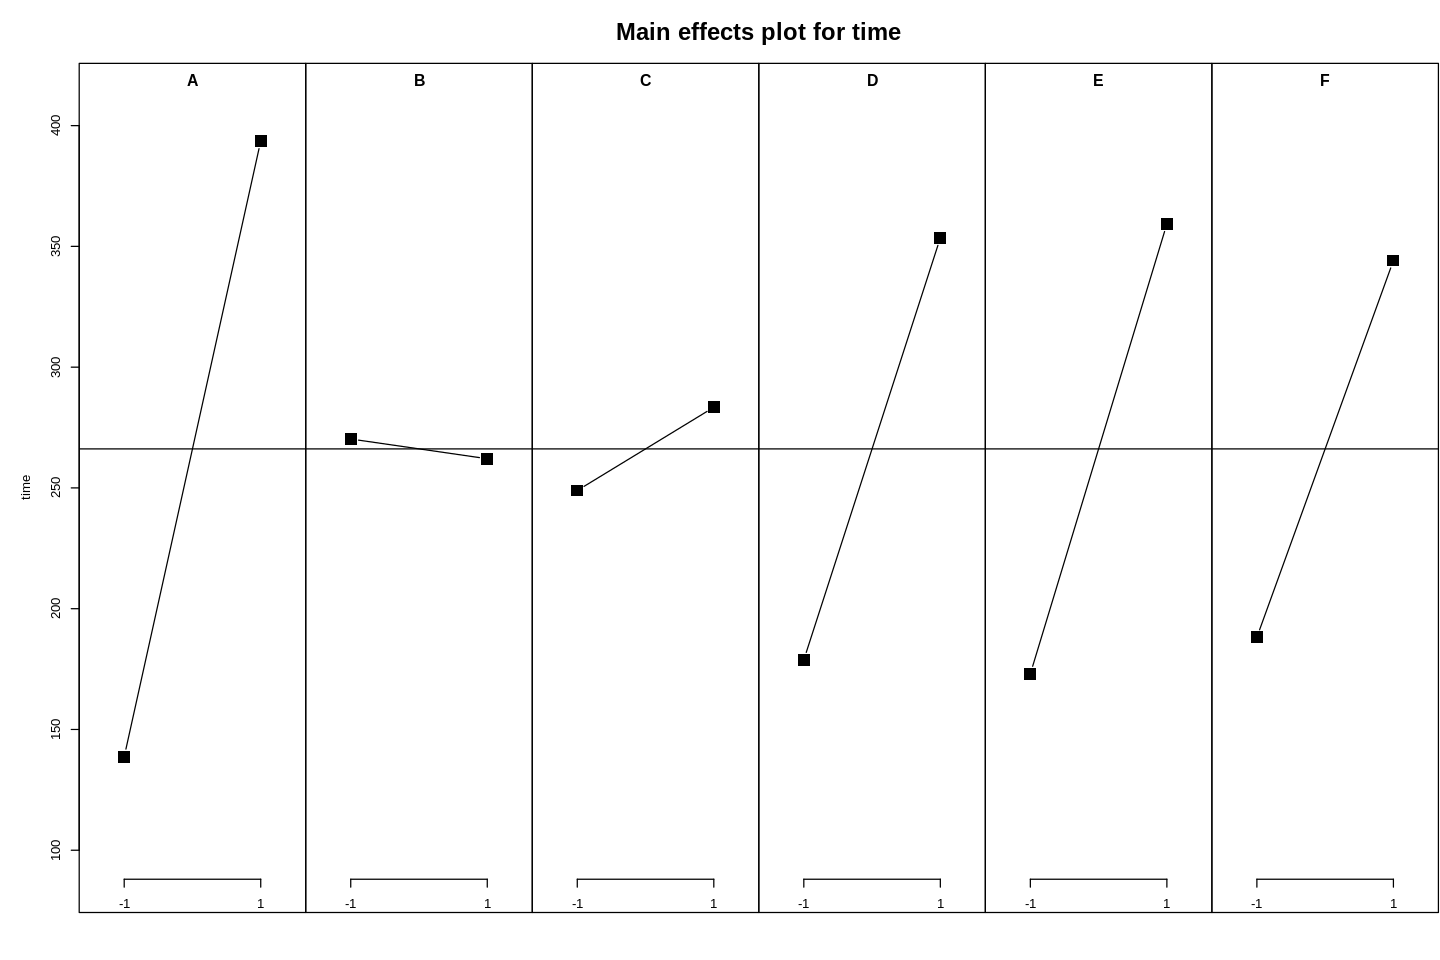

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)
MEPlot(designHW)

The main effects plot shows the same result as the daniel plot. Variables B and C don't appear significant.

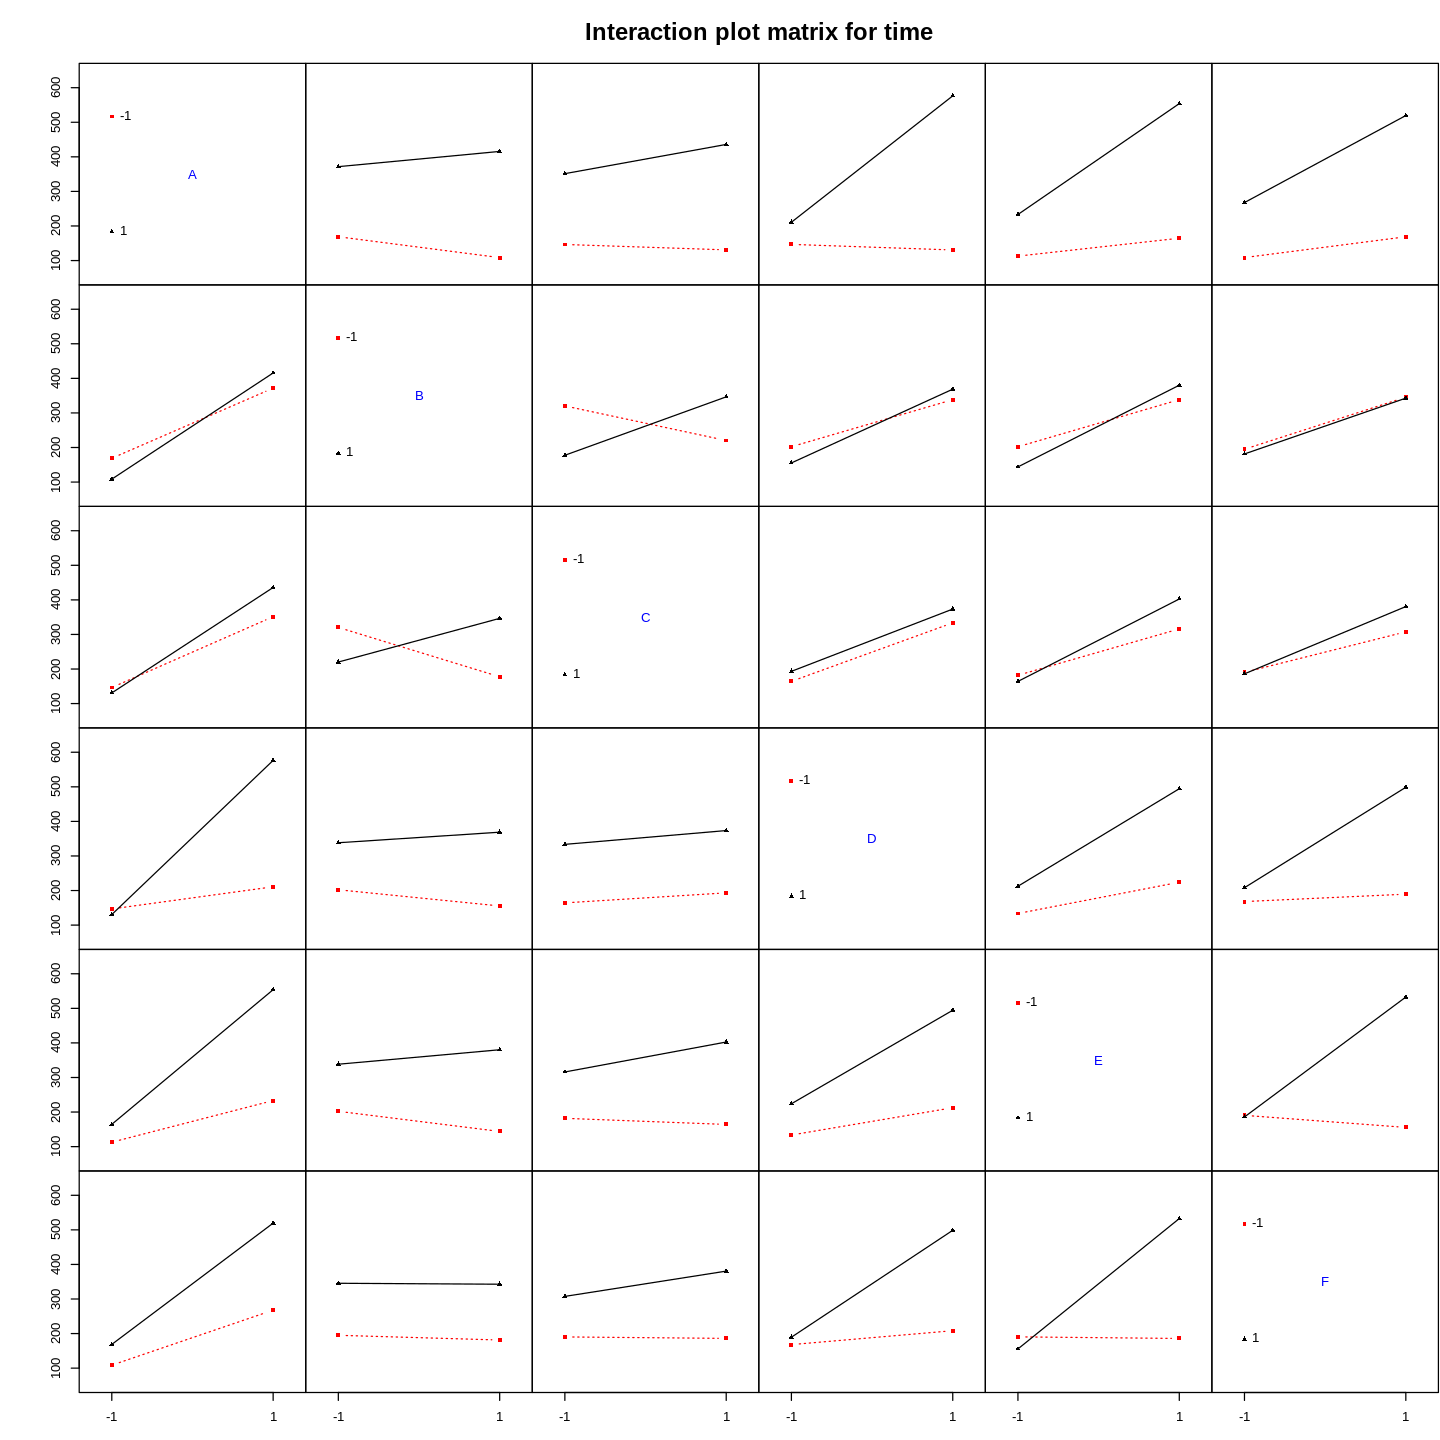

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 12)
IAPlot(designHW)

Matrix size and use of calculator (interaction AD): The interaction effect is significant. The difference in computation time between the two with/without calculator varies depending on the matrix size, suggesting that the effect of the possibility to use calculator is not consistent across different matrix sizes.

Matrix size and range of integers (interaction AE): The plot indicates a significant interaction between matrix size and the range of integers. The impact of the range of integers on time is more pronounced for larger matrices.

Range of integers and use of calculator (interaction EF): This interaction also appears significant. The benefit of using a calculator seems to vary depending on the range of integers involved in the calculation.

Warning message:
“Removed 2 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_segment()`).”


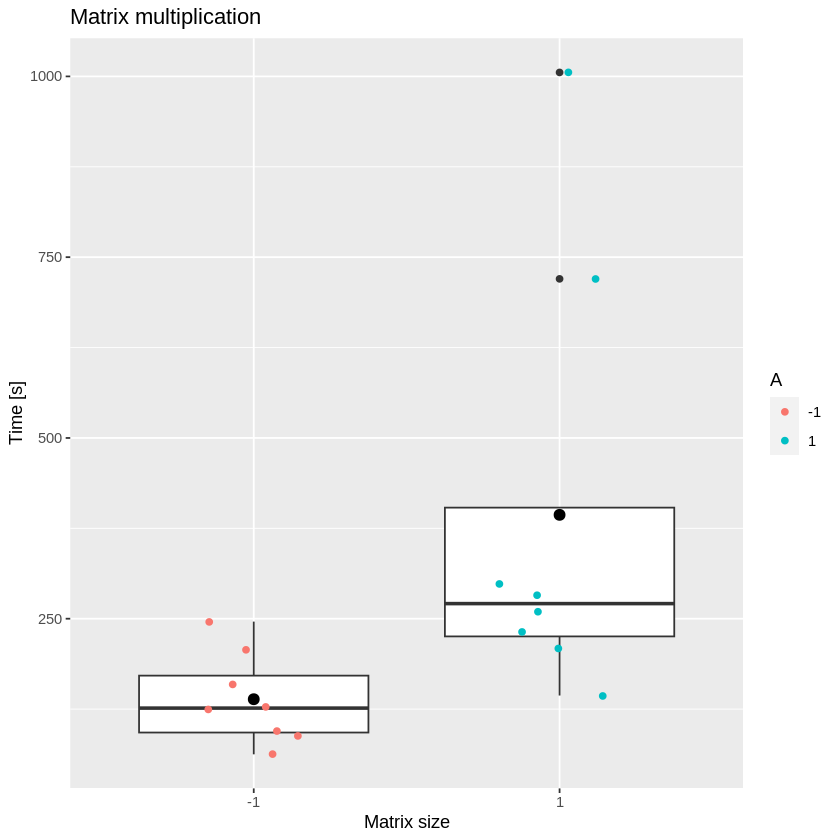

Warning message:
“Removed 2 rows containing missing values (`geom_segment()`).”


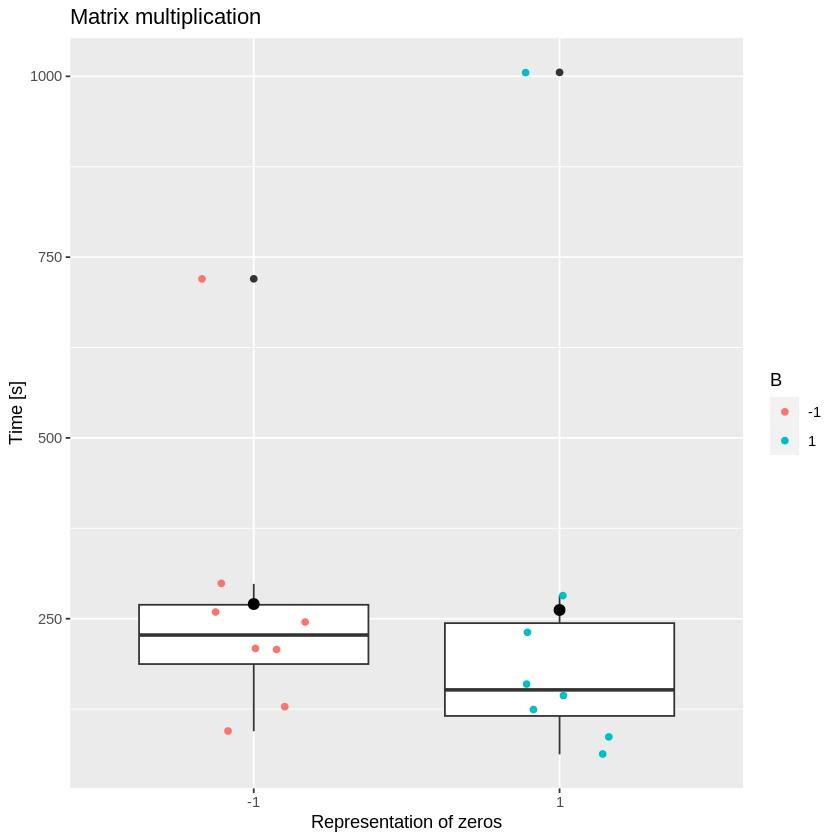

Warning message:
“Removed 2 rows containing missing values (`geom_segment()`).”


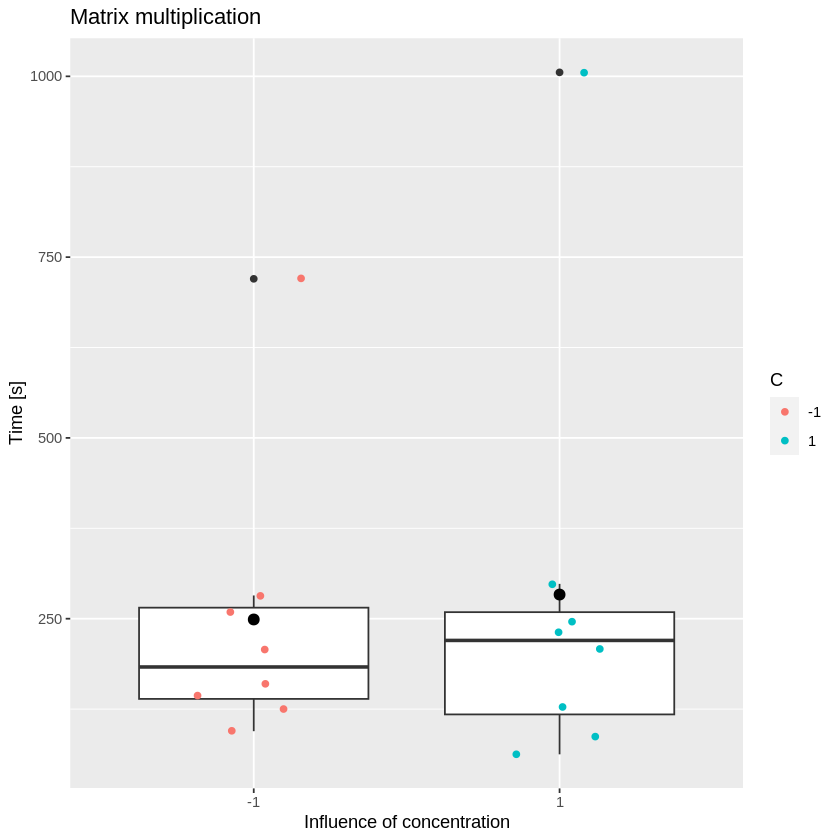

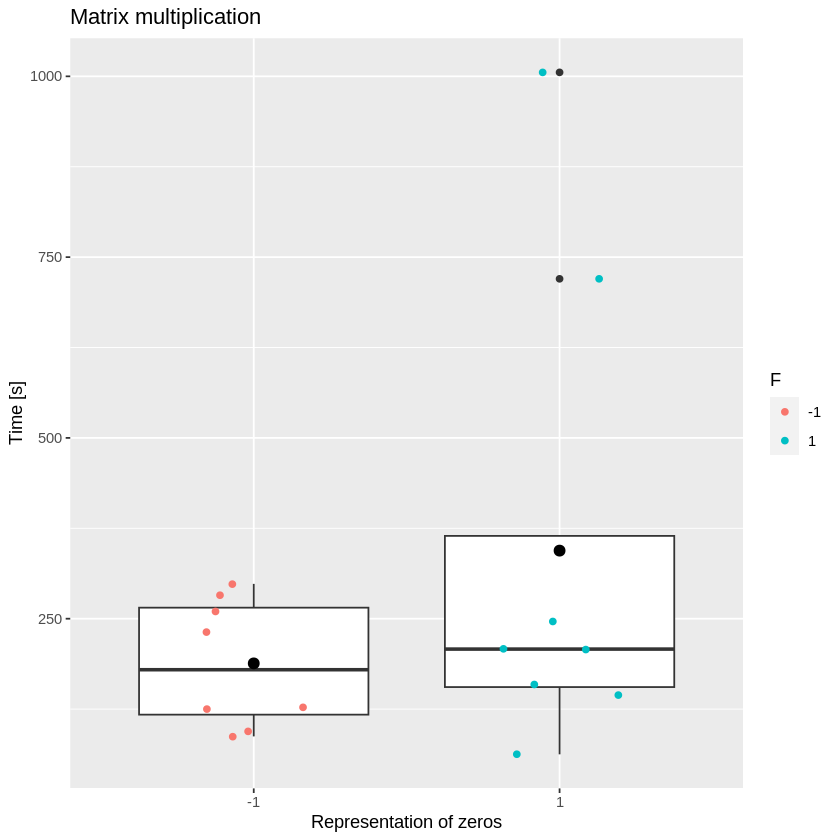

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)
par(mfrow = c(2, 2))
ggplot(designHW, aes(x=A, y=time)) +
  geom_boxplot() +
  stat_summary(fun.y="mean") +
  geom_point(aes(color=A), position=position_jitter(width=0.2)) +
  labs(title="Matrix multiplication", x="Matrix size", y="Time [s]")

ggplot(designHW, aes(x=B, y=time)) +
  geom_boxplot() +
  stat_summary(fun.y="mean") +
  geom_point(aes(color=B), position=position_jitter(width=0.2)) +
  labs(title="Matrix multiplication", x="Representation of zeros", y="Time [s]")


ggplot(designHW, aes(x=C, y=time)) +
  geom_boxplot() +
  stat_summary(fun.y="mean") +
  geom_point(aes(color=C), position=position_jitter(width=0.2)) +
  labs(title="Matrix multiplication", x="Influence of concentration", y="Time [s]")

ggplot(designHW, aes(x=D, y=time)) +
  geom_boxplot() +
  stat_summary(fun.y="mean") +
  geom_point(aes(color=D), position=position_jitter(width=0.2)) +
  labs(title="Matrix multiplication", x="Computational core", y="Time [s]")

ggplot(designHW, aes(x=E, y=time)) +
  geom_boxplot() +
  stat_summary(fun.y="mean") +
  geom_point(aes(color=E), position=position_jitter(width=0.2)) +
  labs(title="Matrix multiplication", x="Range of integers", y="Time [s]")

ggplot(designHW, aes(x=F, y=time)) +
  geom_boxplot() +
  stat_summary(fun.y="mean") +
  geom_point(aes(color=F), position=position_jitter(width=0.2)) +
  labs(title="Matrix multiplication", x="Using calculator", y="Time [s]")

4) Perform analysis of variance, find and validate the resulting model without center point.



We omit the triple interactions to leave degrees of freedom.

In [ ]:
model <- lm(time ~ A + B + C + D + E + F + A:B + A:C + B:C + A:D + B:D + C:D + D:E, data=designHW)
anova_result <- anova(model)
print(anova_result)

Analysis of Variance Table

Response: time
          Df Sum Sq Mean Sq F value  Pr(>F)  
A          1 260057  260057 20.2886 0.04592 *
B          1    267     267  0.0208 0.89843  
C          1   4748    4748  0.3704 0.60468  
D          1 122128  122128  9.5279 0.09088 .
E          1 138788  138788 10.8277 0.08126 .
F          1  97289   97289  7.5901 0.11036  
A:B        1  10883   10883  0.8491 0.45409  
A:C        1  10020   10020  0.7817 0.46990  
B:C        1  72411   72411  5.6492 0.14062  
A:D        1 145746  145746 11.3705 0.07782 .
B:D        1   5982    5982  0.4667 0.56504  
C:D        1    119     119  0.0093 0.93197  
D:E        1  36715   36715  2.8644 0.23264  
Residuals  2  25636   12818                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Shrinking the model and leaving only significant variables and interactions.

In [ ]:
model_red <- lm(time ~ A + D + E + F + A:D + A:E, data=designHW)
anova_result <- anova(model_red)
print(anova_result)

Analysis of Variance Table

Response: time
          Df Sum Sq Mean Sq F value    Pr(>F)    
A          1 260057  260057 24.8013 0.0007593 ***
D          1 122128  122128 11.6472 0.0077154 ** 
E          1 138788  138788 13.2361 0.0054166 ** 
F          1  97289   97289  9.2784 0.0138815 *  
A:D        1 145746  145746 13.8997 0.0047103 ** 
A:E        1  72411   72411  6.9057 0.0274540 *  
Residuals  9  94370   10486                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


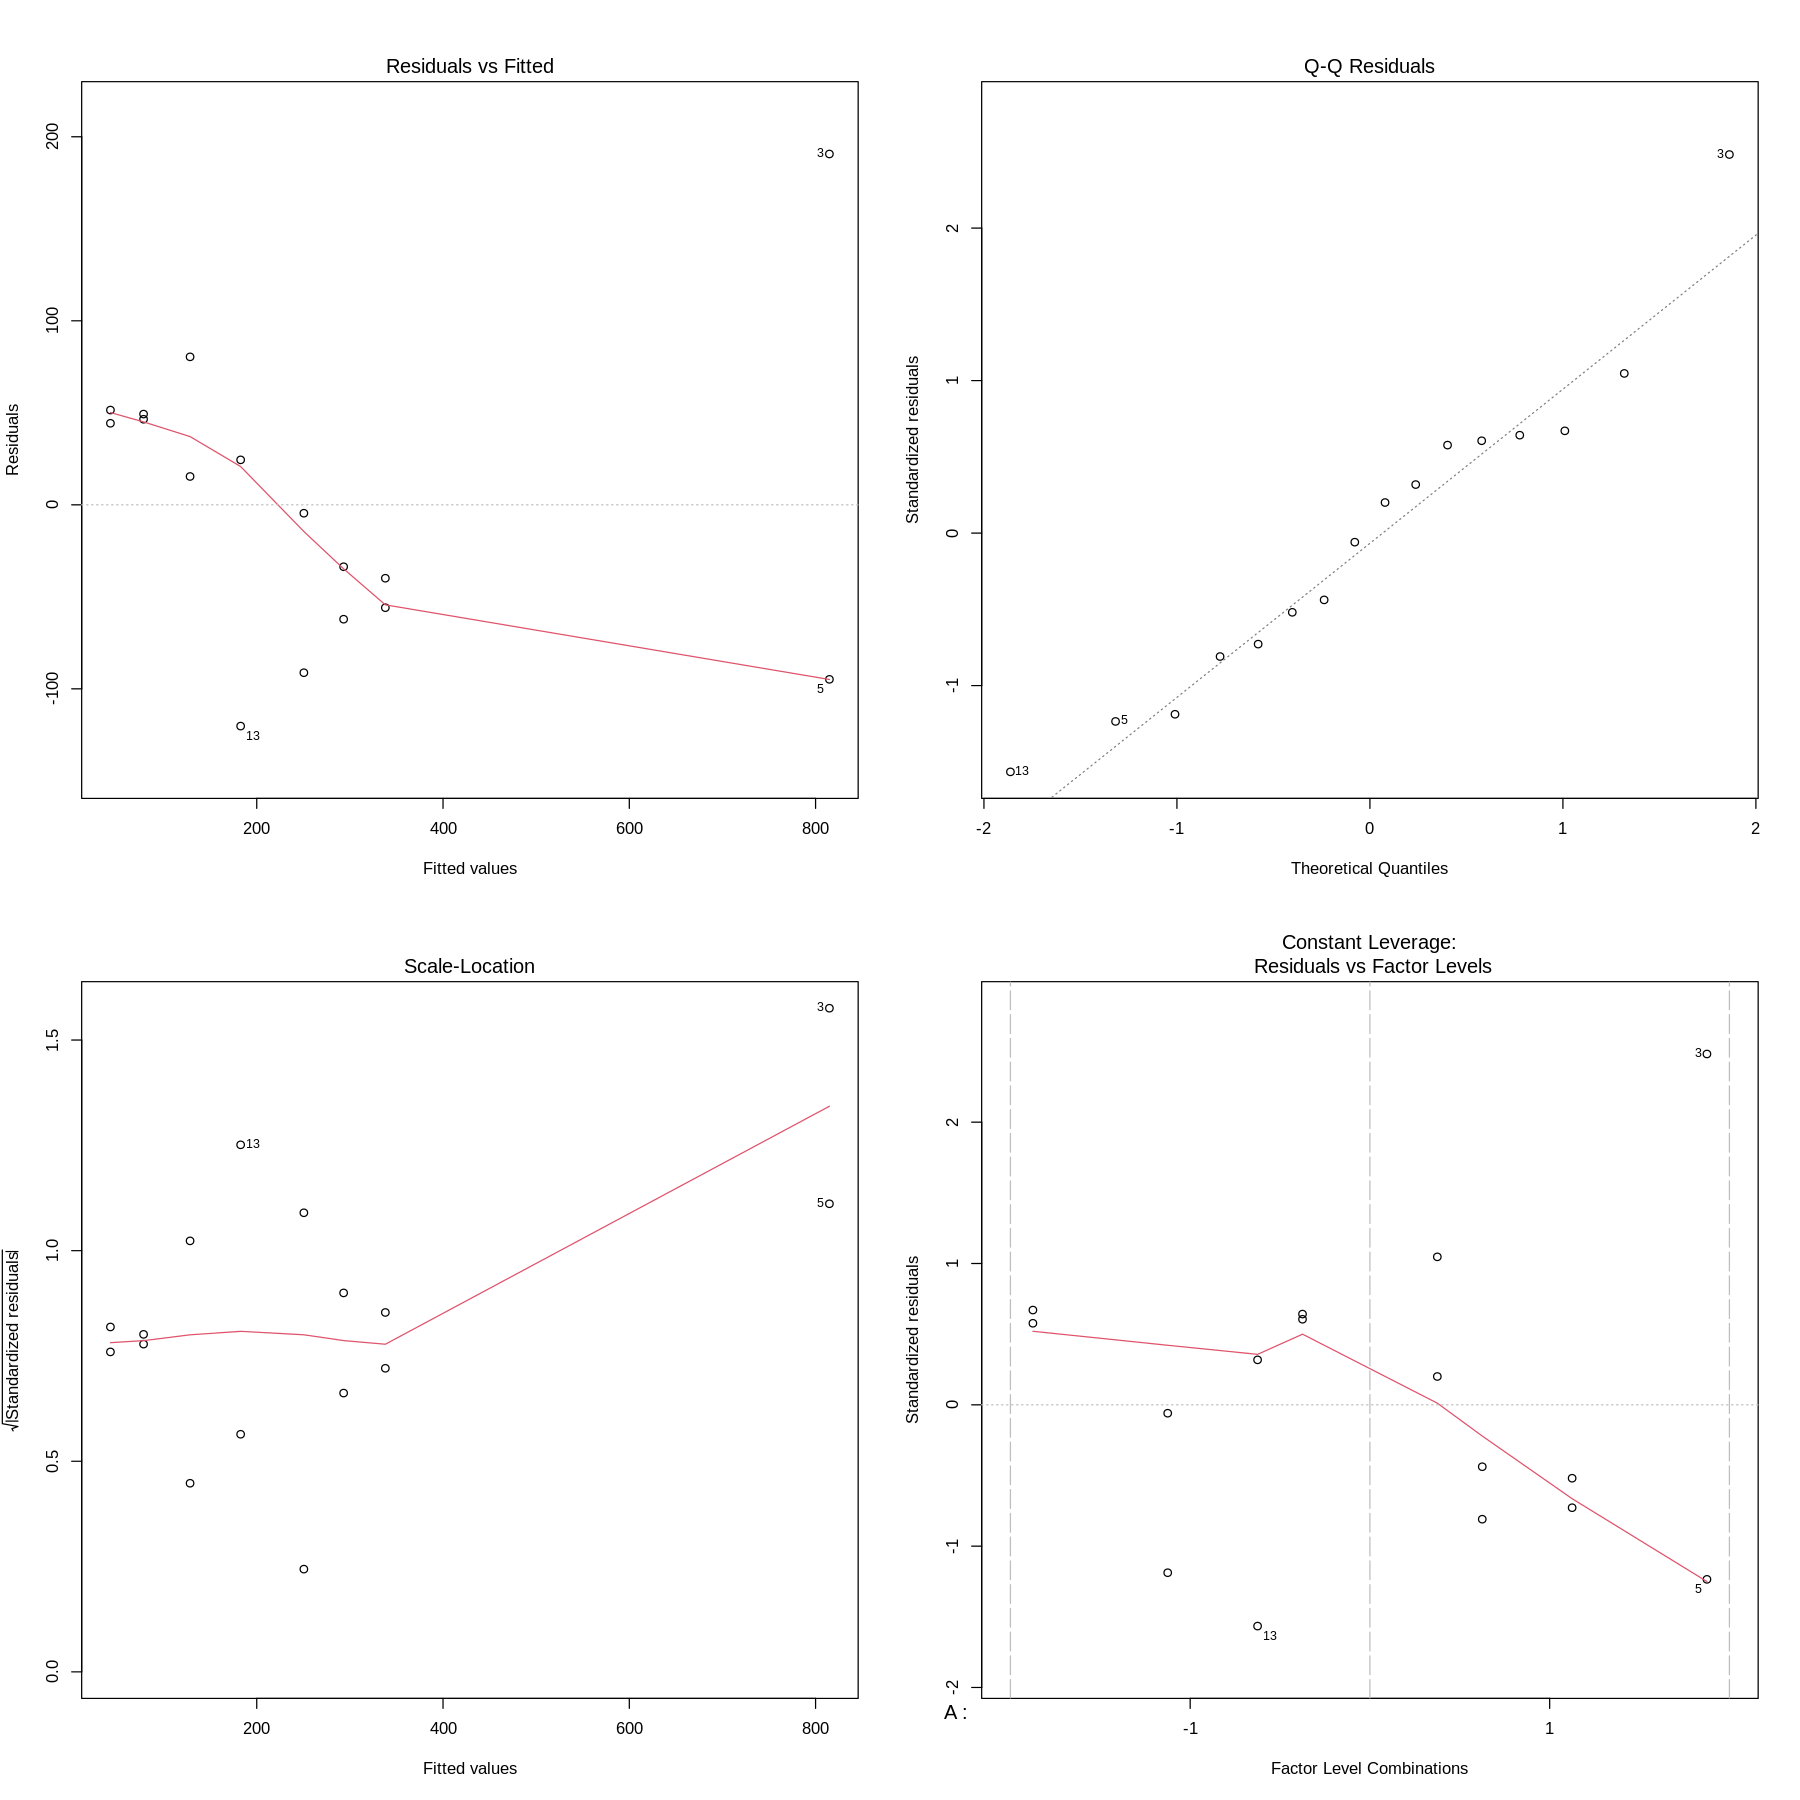

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 15)
par(mfrow = c(2, 2))
plot(model_red)

Two "outliers", (3), (5) - probably caused by the random generation accumulating many numbers greater than 10 in the matrix.

5) Use additional assumptions and additional measurements at the centres,
     and confirm or reject assumption of the linear dependence in the numerical variables.



In [ ]:
#Dále je potřeba pracovat s des proměnnou - včetně centerpointů
des = FrF2(2^(6-2), 6, replications = 1, randomize = T, seed = c(42), generators = c("ABC","BCD"),
                            factor.names = LETTERS[1:6])
centers = matrix(c(0,0,1,1,0,1,0,0,1,1,0,-1,0,0,1,-1,0,-1,0,0,1,-1,0,1,0,0,-1,1,0,1,0,0,-1,1,0,-1,0,0,-1,-1,0,1,0,0,-1,-1,0,-1), nrow = 6)
centers = t(centers)
colnames(centers) =  c("A", "B", "C", "D", "E", "F")
des$A = ifelse(as.numeric(des$A) == 1, -1, 1)
des$B = ifelse(as.numeric(des$B) == 1, -1, 1)
des$E = ifelse(as.numeric(des$E) == 1, -1, 1)

des = rbind(des, centers)
time <- c(94.4, 246.02, 1005.5, 207.15, 720, 143.81, 259.63, 298.18, 231.11, 87.22, 124.98, 127.79, 62.47, 282.16, 159.35, 208.82, 99.01, 141.01, 93.42, 110.94, 166.66, 132.27, 212.08, 115.93)
des$time <- time
des

A,B,C,D,E,F,time
<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>
-1,-1,-1,-1,-1,-1,94.40
-1,-1,1,-1,1,1,246.02
1,1,1,1,1,1,1005.50
-1,-1,-1,1,-1,1,207.15
1,-1,-1,1,1,1,720.00
1,1,-1,-1,-1,1,143.81
1,-1,-1,-1,1,-1,259.63
1,-1,1,1,-1,-1,298.18
1,1,1,-1,1,-1,231.11


In [ ]:
mod1 = lm(time ~ A + D + E + F + A:D + A:E, data=des)
anova_result <- anova(mod1)
print(anova_result)

Analysis of Variance Table

Response: time
          Df Sum Sq Mean Sq F value    Pr(>F)    
A          1 260057  260057 17.0387 0.0007032 ***
D          1  82187   82187  5.3848 0.0330050 *  
E          1 138788  138788  9.0933 0.0077926 ** 
F          1  76355   76355  5.0028 0.0389979 *  
A:D        1 145746  145746  9.5492 0.0066429 ** 
A:E        1  72411   72411  4.7443 0.0437636 *  
Residuals 17 259466   15263                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


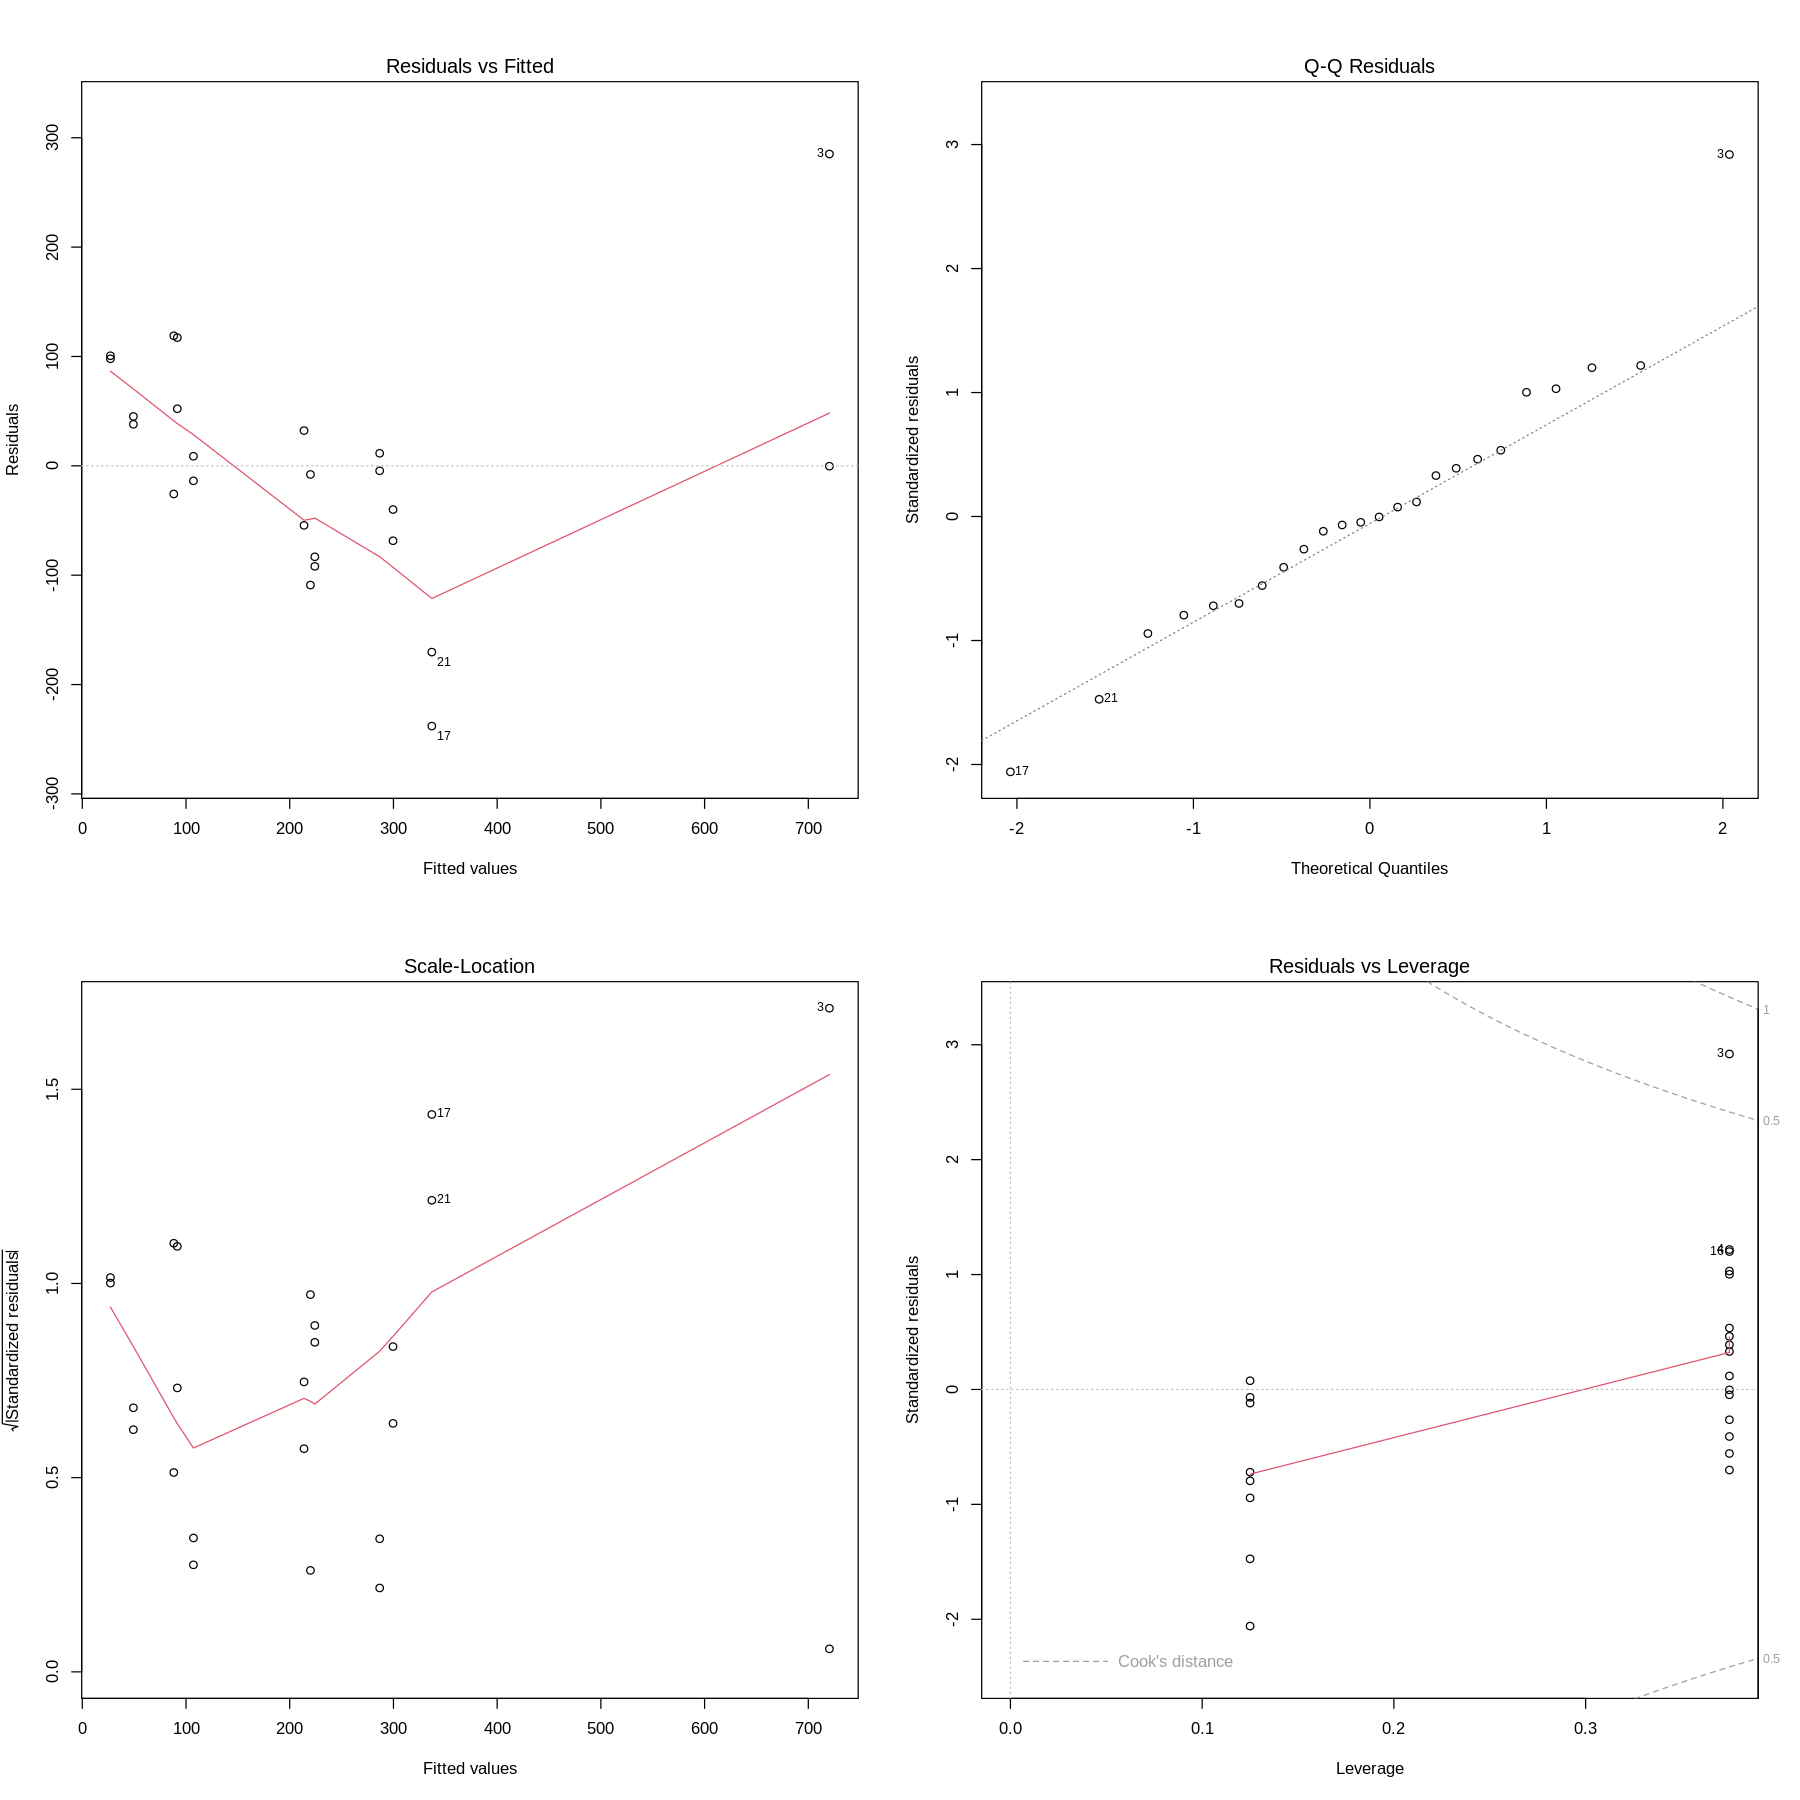

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 15)
par(mfrow = c(2, 2))
plot(mod1)

6) Construct a regression model where you convert the coded quantitative variables to actual numerical values    (use the other variables according to their significance).

  

In [ ]:
A_num <- ifelse(des$A == 1, 4, ifelse(des$A == -1, 3, sqrt(12)))
B_num <- ifelse(des$B == 1, 0.3, ifelse(des$B == -1, 0.1, 0.2))
#C_num <- ifelse(des$C == 1, 1, -1)
#D_num <- ifelse(des$D == 1, 1, -1)
E_num <- ifelse(des$E == 1, 20, ifelse(des$B == -1, 10, 15))
#F_num <- ifelse(des$F == 1, 1, -1)

des_num <- data.frame(A_num, B_num, des$C, des$D, E_num, des$F, des$time)
colnames(des_num) <- c("A_num", "B_num", "C", "D", "E_num", "F", "time")

des_num

A_num,B_num,C,D,E_num,F,time
<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>
3.000000,0.1,-1,-1,10,-1,94.40
3.000000,0.1,1,-1,20,1,246.02
4.000000,0.3,1,1,20,1,1005.50
3.000000,0.1,-1,1,10,1,207.15
4.000000,0.1,-1,1,20,1,720.00
4.000000,0.3,-1,-1,15,1,143.81
4.000000,0.1,-1,-1,20,-1,259.63
4.000000,0.1,1,1,10,-1,298.18
4.000000,0.3,1,-1,20,-1,231.11


In [ ]:
mod2 <- lm(time ~ A_num + D + E_num + F + A_num:D + A_num:E_num, data=des_num)
summary(mod2)


Call:
lm.default(formula = time ~ A_num + D + E_num + F + A_num:D + 
    A_num:E_num, data = des_num)

Residuals:
     Min       1Q   Median       3Q      Max 
-210.865  -59.268    6.139   47.795  293.705 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1277.25     924.76   1.381  0.18511   
A_num        -427.38     262.03  -1.631  0.12127   
D1          -1241.14     441.41  -2.812  0.01200 * 
E_num         -85.46      53.61  -1.594  0.12931   
F1            112.81      51.36   2.197  0.04221 * 
A_num:D1      389.38     125.69   3.098  0.00653 **
A_num:E_num    30.30      15.17   1.997  0.06206 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 125.8 on 17 degrees of freedom
Multiple R-squared:  0.7401,	Adjusted R-squared:  0.6483 
F-statistic: 8.067 on 6 and 17 DF,  p-value: 0.0003124


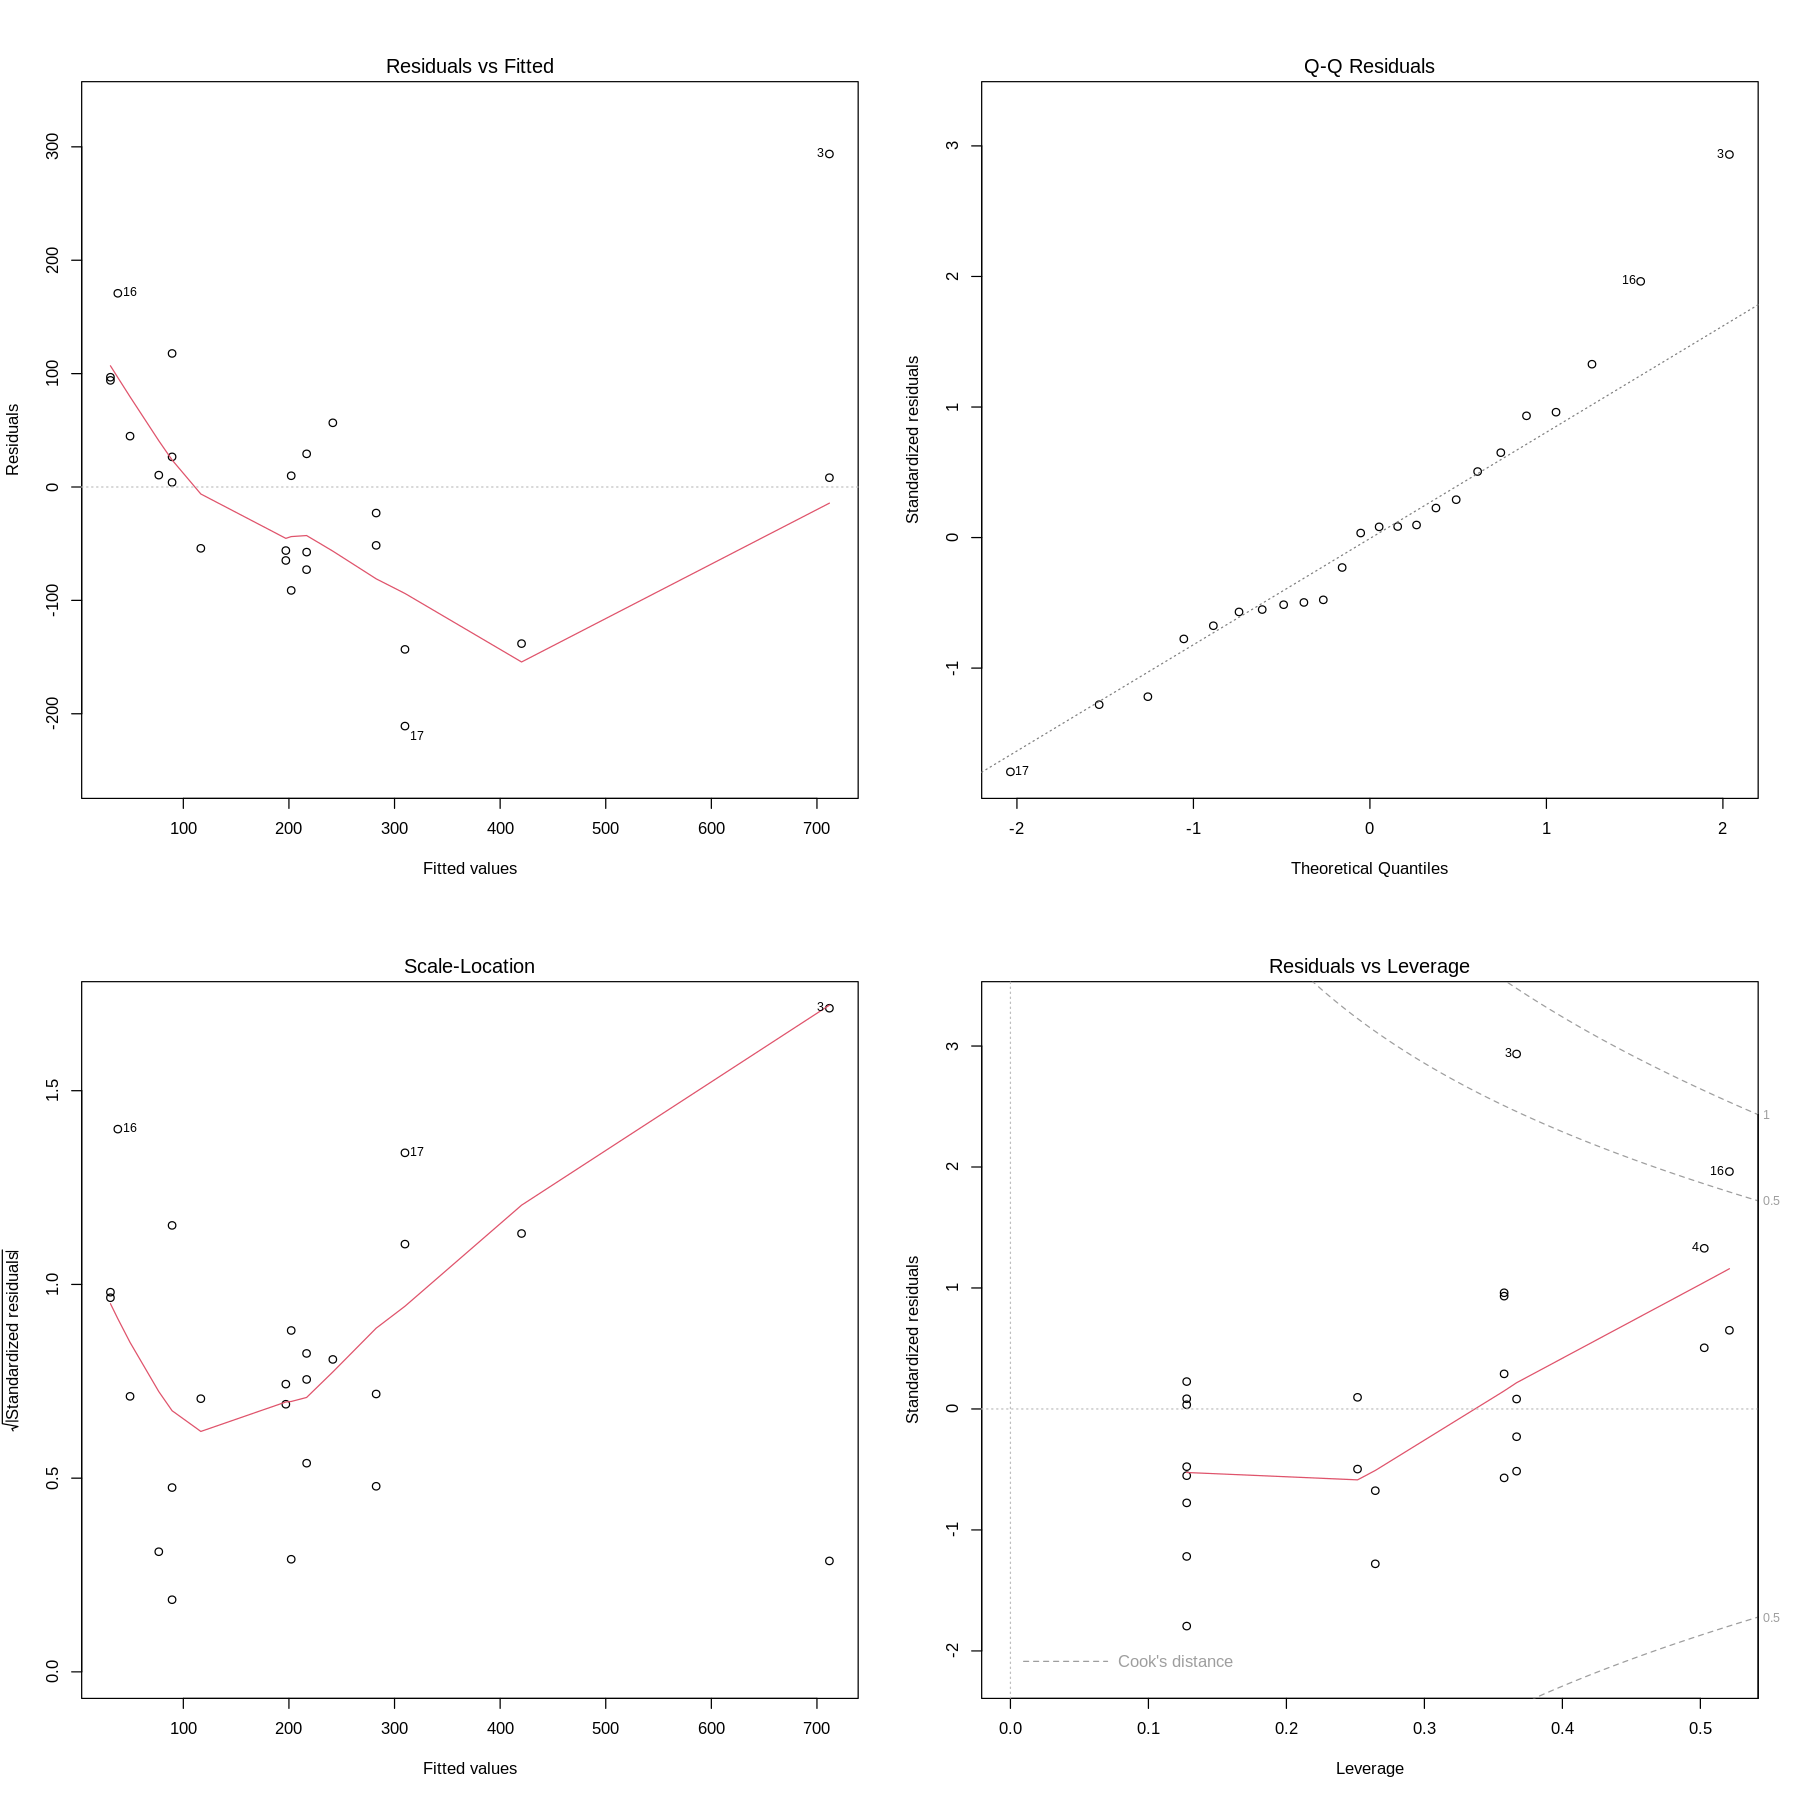

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 15)
par(mfrow = c(2, 2))
plot(mod2)

7) Use a regression model with at least two numerical variables (even if they are less significant). Plot a contour plot for the two quantitative variables and find the optimal values (maximum/minimum response) in intervals increased by 10% compared to the extreme values from the experimental design. In the contour plot, use actual values instead of code values.


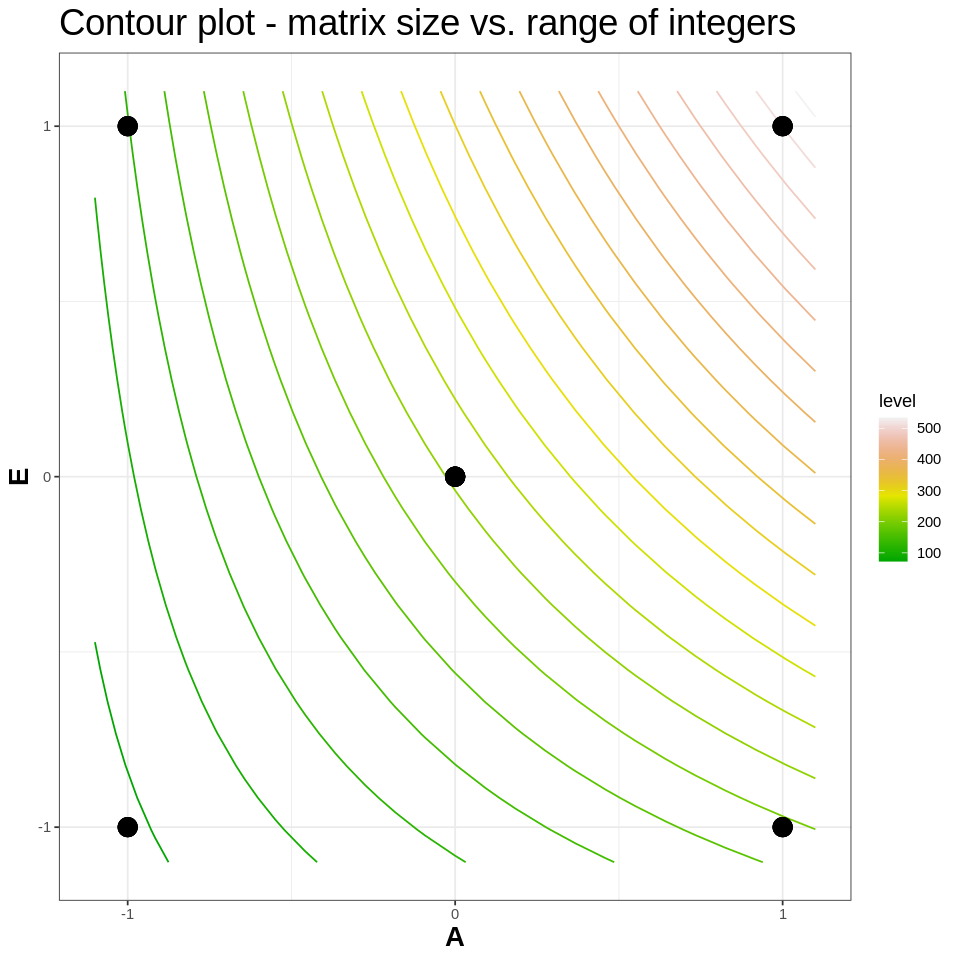

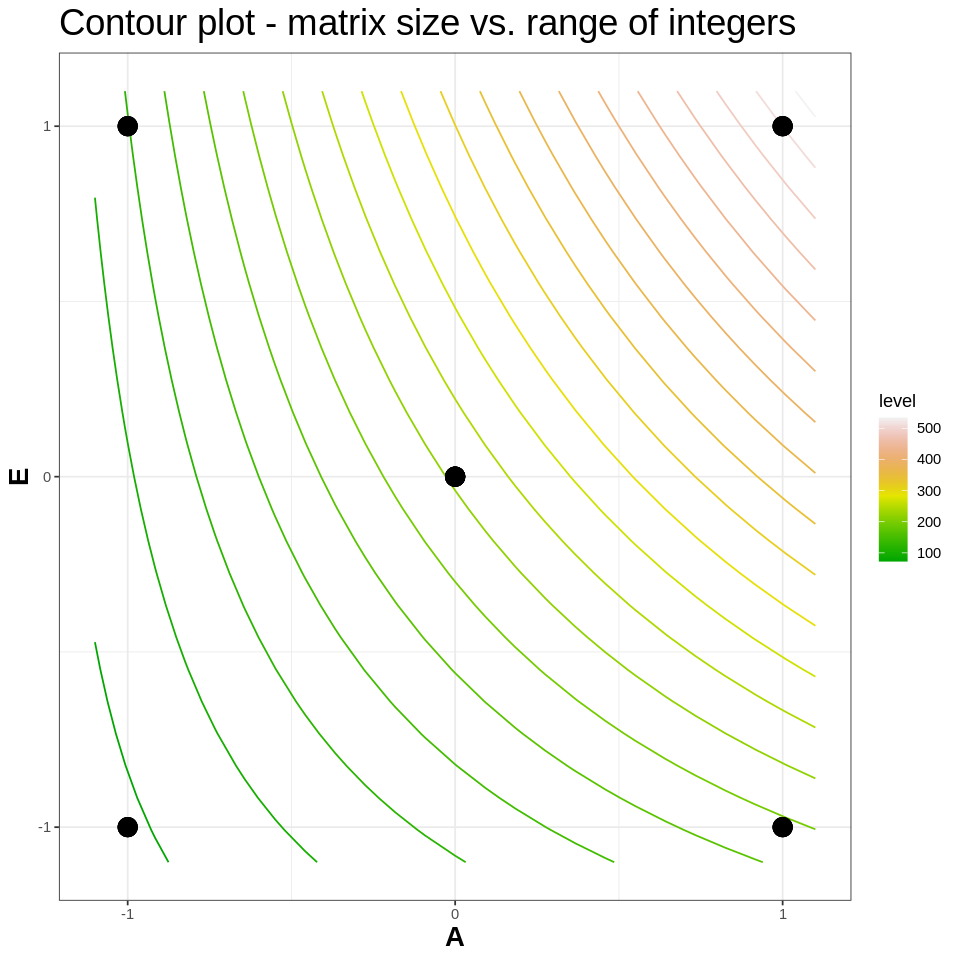

In [ ]:
mod_countour2 = lm(time ~ A + A*E, data=des)

options(repr.plot.width = 8, repr.plot.height = 8)
contourPlot(mod_countour2,
            xlab="A",ylab="E",
            main="Contour plot - matrix size vs. range of integers",
            xlim=c(-1.1, 1.1),
            ylim=c(-1.1, 1.1),
            colour.function=terrain.colors)

It can be seen from the contourPlot that time grows with increasing matrix size (A) and with increasing range of integers (E), with faster growth in the A variable.

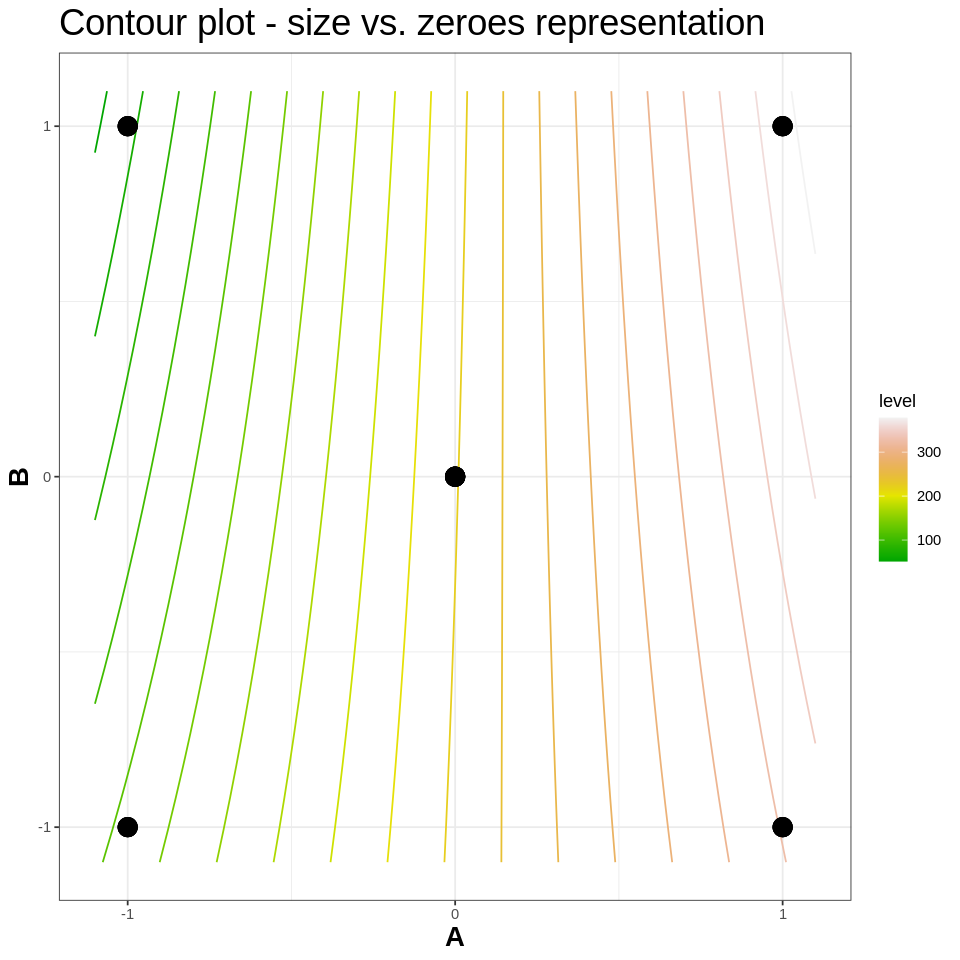

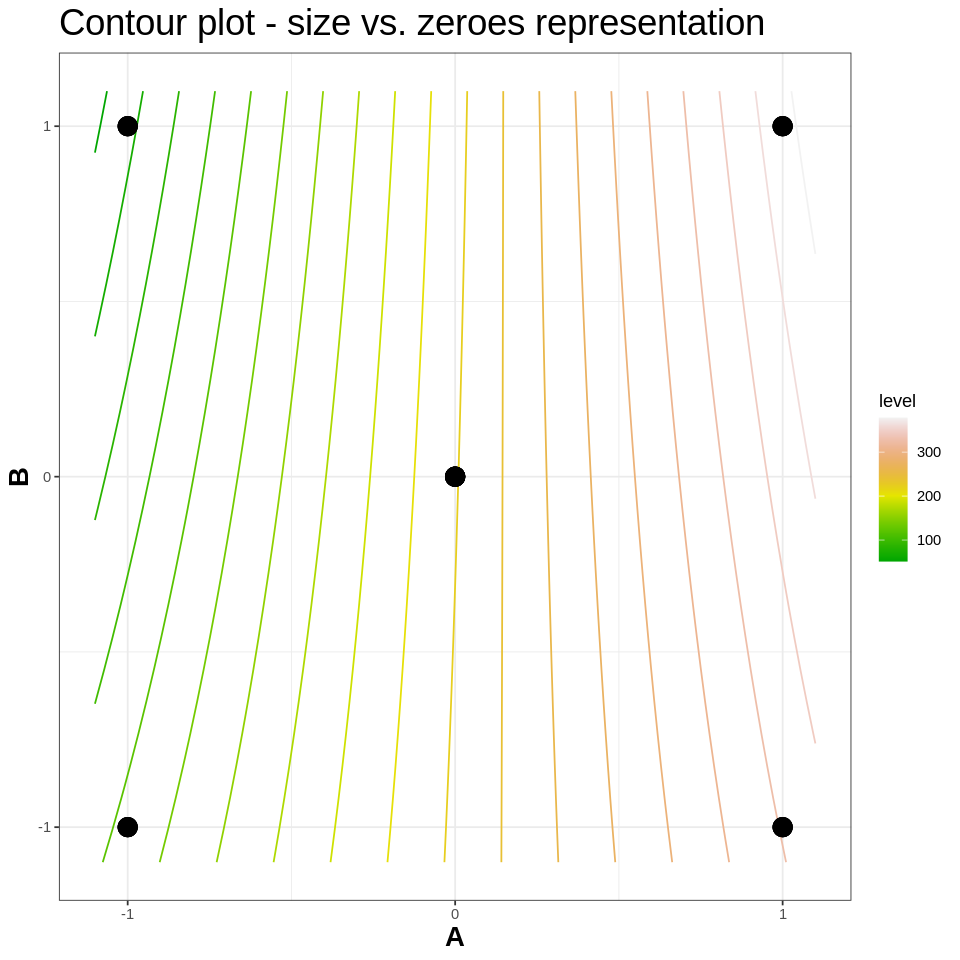

In [ ]:
mod_countour3 = lm(time ~ A + A*B, data=des)

options(repr.plot.width = 8, repr.plot.height = 8)
contourPlot(mod_countour3,
            xlab="A",ylab="B",
            main="Contour plot - size vs. zeroes representation",
            xlim=c(-1.1, 1.1),
            ylim=c(-1.1, 1.1),
            colour.function=terrain.colors)

In [ ]:
# X1 <- runif(20, min=-1, max=1)  # factor 1
# X2 <- runif(20, min=-1, max=1)  # factor 2

# mod_countour1 = lm(time ~ A + E, data=des)

# x1_seq <- seq(min(X1) * 1.1, max(X1) * 1.1, length.out = 100)
# x2_seq <- seq(min(X2) * 1.1, max(X2) * 1.1, length.out = 100)
# grid <- expand.grid(A=x1_seq, E=x2_seq)
# grid$time <- predict(mod_countour1, newdata=grid)

# # 4. Create Contour Plot
# ggplot(grid, aes(x=A, y=E, z=time)) +
#   geom_contour_filled(breaks = pretty(grid$E, 10)) +
#   labs(title="Contour Plot of Response", x="A", y="E") +
#   theme_minimal()

# # Optimization (finding maximum or minimum)
# optim_point <- grid[which.max(grid$E),]  # Change to which.min for minimum
# print(optim_point)